# Sentiment analysis

## Installing necessary packages

In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install flair

Note: you may need to restart the kernel to use updated packages.


In [3]:
#]https://towardsdatascience.com/5-lesser-known-python-libraries-for-your-next-nlp-project-ff13fc652553

In [4]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install distilbert-punctuator

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install textstat

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install gibberish-detector

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


 ## Importing libraries

In [9]:
import pandas as pd
import torch
import csv
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import flair
model = flair.models.TextClassifier.load('en-sentiment')
import re
from textblob import TextBlob

[nltk_data] Downloading package punkt to /home/elaheh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2023-01-21 16:23:20,833 loading file /home/elaheh/.flair/models/sentiment-en-mix-distillbert_4.pt


In [10]:
import contractions

In [11]:
from gibberish_detector import detector

In [12]:
from dbpunctuator.inference import Inference, InferenceArguments
from dbpunctuator.utils import DEFAULT_ENGLISH_TAG_PUNCTUATOR_MAP
args = InferenceArguments(
        model_name_or_path="Qishuai/distilbert_punctuator_en",
        tokenizer_name="Qishuai/distilbert_punctuator_en",
        tag2punctuator=DEFAULT_ENGLISH_TAG_PUNCTUATOR_MAP
    )
punctuator_model = Inference(inference_args=args, 
                             verbose=False)

2023-01-21 16:23:29,074 - INFO - inference_interface.py:75 - inference_interface._produce_server - 23558 - set up punctuator
2023-01-21 16:23:37,798 - INFO - inference_interface.py:88 - inference_interface._produce_server - 23558 - start running punctuator
2023-01-21 16:23:39,033 - INFO - inference_interface.py:91 - inference_interface._produce_server - 23558 - start client
2023-01-21 16:23:39,051 - INFO - inference_pipeline.py:311 - inference_pipeline.run - 23666 - server is running


In [13]:
import textstat

### Data processing and Visualisation

In [14]:
data = pd.read_csv('moviereviews.tsv', sep='\t')

In [15]:
data.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [16]:
data.label.unique()

array(['neg', 'pos'], dtype=object)

In [17]:
data['Binary'] = data['label'].map({ 'neg' : 0, 'pos' : 1})

In [18]:
data.head(10)

,label,review,Binary
0,neg,how do films like mouse hunt get into theatres...,0
1,neg,some talented actresses are blessed with a dem...,0
2,pos,this has been an extraordinary year for austra...,1
3,pos,according to hollywood movies made in last few...,1
4,neg,my first press screening of 1998 and already i...,0
5,neg,"to put it bluntly , ed wood would have been pr...",0
6,neg,"synopsis : melissa , a mentally-disturbed woma...",0
7,neg,tim robbins and martin lawernce team up in thi...,0
8,neg,"in "" gia "" , angelina jolie plays the titular ...",0
9,neg,"in 1990 , the surprise success an unheralded l...",0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
 2   Binary  2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [20]:
t= data['review'][0][:150]
t

"how do films like mouse hunt get into theatres ? \r\nisn't there a law or something ? \r\nthis diabolical load of claptrap from steven speilberg's dreamwo"

In [21]:
t2= contractions.fix(t, slang=True)
print(t2) 

how do films like mouse hunt get into theatres ? 
is not there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamwo


In [22]:
text1= data['review'][0][:40]
print(text1)
text2= punctuator_model.punctuation(text1)

2023-01-21 16:23:39,251 - INFO - inference_pipeline.py:173 - inference_pipeline.pre_process - 23666 - self split indexes: []


how do films like mouse hunt get into th


In [23]:
print(text2)

(['H.', 'O.', 'W', '', 'D.', 'O.', '', 'F.', 'I.', 'L.', 'M.', 'S.', '', 'L.', 'I.', 'K.', 'E.', '', 'M.', 'O.', 'U.', 'S.', 'E.', '', 'H.', 'U.', 'N', 'T.', '', 'G.', 'E.', 'T.', '', 'I.', 'N', 'T.', 'O.', '', 'T.', 'H.'], [['PERIOD'], ['PERIOD'], ['O'], [], ['PERIOD'], ['PERIOD'], [], ['PERIOD'], ['PERIOD'], ['PERIOD'], ['PERIOD'], ['PERIOD'], [], ['PERIOD'], ['PERIOD'], ['PERIOD'], ['PERIOD'], [], ['PERIOD'], ['PERIOD'], ['PERIOD'], ['PERIOD'], ['PERIOD'], [], ['PERIOD'], ['PERIOD'], ['O'], ['PERIOD'], [], ['PERIOD'], ['PERIOD'], ['PERIOD'], [], ['PERIOD'], ['O'], ['PERIOD'], ['PERIOD'], [], ['PERIOD'], ['PERIOD']])


In [24]:
print(textstat.flesch_reading_ease(str(data['review'])))

87.31


In [25]:
print(textstat.reading_time(data['review'][0], ms_per_char=70))

126.21


In [26]:
print(textstat.lexicon_count(data['review'][0], removepunct=True))

373


In [27]:
data_sample = data.sample(30) # Because of maximum number of 512 tags of sentence

In [28]:
pwd

'/home/elaheh/Documents/University/Self_learning/2023/git/1-Sentiment_Anaylsis (2022)'

## Neural models 

In [29]:
text = data['review'][10]

In [30]:
def text_predict(text):
  sentence = flair.data.Sentence(text)
  model.predict(sentence)
  return sentence.labels[0].score

In [31]:
type(data['review'][0])

str

In [32]:
text_predict(text)

0.9999516010284424

In [33]:
def text_predict_label(text):
  sentence = flair.data.Sentence(text)
  model.predict(sentence)
  return sentence.labels[0].value

In [34]:
text_predict_label(text)

'NEGATIVE'

In [35]:
list(data['review'])[0]

'how do films like mouse hunt get into theatres ? \r\nisn\'t there a law or something ? \r\nthis diabolical load of claptrap from steven speilberg\'s dreamworks studio is hollywood family fare at its deadly worst . \r\nmouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . \r\nwriter adam rifkin and director gore verbinski are the names chiefly responsible for this swill . \r\nthe plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . \r\ndeciding to check out the long-abandoned house , they soon learn that it\'s worth a fortune and set about selling it in auction to the highest bidder . \r\nbut battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . \r\

In [36]:
sentence = flair.data.Sentence(text)
model.predict(sentence)
sentence

Sentence: "upon first viewing of this movie , the phrases " been there " and " done that " come quickly to mind . spy hard manages to steal almost every joke from the zucker brothers films , the most popular of which are airplane and the naked gun series . stealing stuff can be profitable in this industry , but only when you steal the right stuff . what little plot there is involves dick steele , aka . agent wd-40 ( leslie nielsen ) trying to save the world from an almost deranged madman played by andy griffith . along the way to it goal ( goal ? ) , the film manages to spoof mainly the james bond type films , but also manages to hit on films such as home alone and sister act . the trick about spoofing is that you have to actually be funny , or at the least , satirical . spy hard achieves neither , as it borrows all of the wrong elements from the superior zucker brothers films . the " dick , the world is in danger . what is it ? well , it 's a big roundish ball floating in space around

In [37]:
type(sentence)

flair.data.Sentence

In [38]:
sentence.get_labels()[0]

'Sentence: "upon first viewing of this movie , the phrases " been there " and " done that " come quickly to mind . spy hard manages to steal almost every joke from the zucker brothers films , the most popular of which are airplane and the naked gun series . stealing stuff can be profitable in this industry , but only when you steal the right stuff . what little plot there is involves dick steele , aka . agent wd-40 ( leslie nielsen ) trying to save the world from an almost deranged madman played by andy griffith . along the way to it goal ( goal ? ) , the film manages to spoof mainly the james bond type films , but also manages to hit on films such as home alone and sister act . the trick about spoofing is that you have to actually be funny , or at the least , satirical . spy hard achieves neither , as it borrows all of the wrong elements from the superior zucker brothers films . the " dick , the world is in danger . what is it ? well , it 's a big roundish ball floating in space aroun

In [39]:
type(sentence.labels[0])

flair.data.Label

In [40]:
sentence.labels[0].score, sentence.labels[0].value

(0.9999516010284424, 'NEGATIVE')

In [41]:
type(sentence.labels[0])


flair.data.Label

In [42]:
scores= []
predicted_labels = []
for i in list(data_sample['review']):
  if type(i) == str :
    # print(type(i))
    print(text_predict(i))
    predicted_labels.append(text_predict_label(i))
    scores.append(text_predict(i))
  else:
    scores.append(' ')
    predicted_labels.append(' ')
print(scores)
print(len(scores))

0.9999775886535645
0.99964439868927
0.9966616630554199
0.9999855756759644
0.9999983310699463
0.999894380569458
0.9615305662155151
0.9658523201942444
0.9980831146240234
0.9991727471351624
0.9999969005584717
0.9999852180480957
0.9913908243179321
0.9992783665657043
0.9998279809951782
0.6583617925643921
0.9720681309700012
0.9998542070388794
0.9985743761062622
0.9999949932098389
0.6811572313308716
0.999925971031189
0.9999924898147583
0.9962194561958313
0.9999786615371704
0.9992926120758057
0.9999864101409912
0.9994984865188599
0.9971070885658264
0.9999291896820068
[0.9999775886535645, 0.99964439868927, 0.9966616630554199, 0.9999855756759644, 0.9999983310699463, 0.999894380569458, 0.9615305662155151, 0.9658523201942444, 0.9980831146240234, 0.9991727471351624, 0.9999969005584717, 0.9999852180480957, 0.9913908243179321, 0.9992783665657043, 0.9998279809951782, 0.6583617925643921, 0.9720681309700012, 0.9998542070388794, 0.9985743761062622, 0.9999949932098389, 0.6811572313308716, 0.99992597103118

In [43]:
data_sample['Predicted_scores_Flair'] = scores
data_sample

,label,review,Binary,Predicted_scores_Flair
8,neg,"in "" gia "" , angelina jolie plays the titular ...",0,0.999978
1745,neg,sean connery stars as a harvard law professor ...,0,0.999644
1175,neg,the previews for the movie are pretty good . \...,0,0.996662
1370,neg,"susan granger's review of "" glitter "" ( 20th c...",0,0.999986
1131,neg,a few months before the release of star wars e...,0,0.999998
1938,neg,capsule : liebes meets tod . \r\nthis was a fi...,0,0.999894
1345,neg,the first scene of operation condor has jackie...,0,0.961531
238,pos,a frequent error is the categorization of a te...,1,0.965852
253,pos,"the "" italian hitchcock "" and acknowledged mas...",1,0.998083
843,neg,chris tucker is one of those guys you immediat...,0,0.999173


In [44]:
data_sample['predicted_labels'] = predicted_labels

In [45]:
data_sample

,label,review,Binary,Predicted_scores_Flair,predicted_labels
8,neg,"in "" gia "" , angelina jolie plays the titular ...",0,0.999978,NEGATIVE
1745,neg,sean connery stars as a harvard law professor ...,0,0.999644,NEGATIVE
1175,neg,the previews for the movie are pretty good . \...,0,0.996662,NEGATIVE
1370,neg,"susan granger's review of "" glitter "" ( 20th c...",0,0.999986,NEGATIVE
1131,neg,a few months before the release of star wars e...,0,0.999998,NEGATIVE
1938,neg,capsule : liebes meets tod . \r\nthis was a fi...,0,0.999894,NEGATIVE
1345,neg,the first scene of operation condor has jackie...,0,0.961531,NEGATIVE
238,pos,a frequent error is the categorization of a te...,1,0.965852,NEGATIVE
253,pos,"the "" italian hitchcock "" and acknowledged mas...",1,0.998083,POSITIVE
843,neg,chris tucker is one of those guys you immediat...,0,0.999173,NEGATIVE


## Non neural models

In [46]:
#SVMs, Random Forests, and Naive Bayes

In [47]:
data = data.dropna()

In [48]:
type(data['review'])

pandas.core.series.Series

In [49]:
X = data['review']
y = data['Binary']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)  

In [52]:
type(X_train)

pandas.core.series.Series

In [53]:
X_test.shape

(786,)

In [54]:
y_test.shape

(786,)

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

In [56]:
vectorizer = CountVectorizer()
dt = DecisionTreeClassifier()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
_ = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64       387
           1       0.64      0.56      0.60       399

    accuracy                           0.62       786
   macro avg       0.62      0.62      0.62       786
weighted avg       0.62      0.62      0.62       786



In [57]:
len(y_pred)

786

In [58]:
len(data['review'])

1965

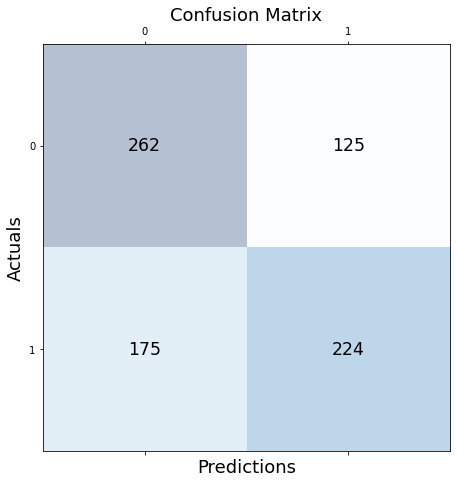

In [59]:
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [61]:
import sklearn

In [62]:
model.score(X_test, y_test)

0.8053435114503816

In [63]:
y_pred2 = model.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       387
           1       0.83      0.77      0.80       399

    accuracy                           0.81       786
   macro avg       0.81      0.81      0.81       786
weighted avg       0.81      0.81      0.81       786



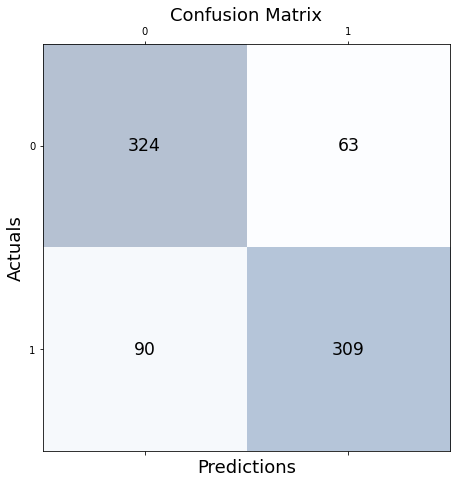

In [64]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred2)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### TextBlob

In [80]:
textblob = TextBlob(data['review'][0])
textblob

TextBlob("how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alterna

In [76]:
print(textblob.sentiment)

Sentiment(polarity=-0.03792102206736352, subjectivity=0.6106271777003484)
